In [18]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
model = pybamm.lithium_ion.DFN(options={
    "SEI": "constant",
    "SEI porosity change": "true",
    #"SEI on cracks": "true",
    #"particle mechanics": "constant cracks",
    #"contact resistance": "true",
})

param = pybamm.ParameterValues("OKane2023")

exp = pybamm.Experiment(
    [("Rest for 60 seconds (1 second period)", "Discharge at 2C for 72 seconds or until 2.5V (0.1 second period)", 
    "Rest for 1 hour (1 second period)")] * 25,
)

var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 30,  # positive particle
}

sim = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=var_pts)
sol = sim.solve()

At t = 0.00449979, , mxstep steps taken before reaching tout.
At t = 0.00449979, , mxstep steps taken before reaching tout.
At t = 0.00200538, , mxstep steps taken before reaching tout.
At t = 0.00200538 and h = 6.83259e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00200538, , mxstep steps taken before reaching tout.
At t = 0.00307335, , mxstep steps taken before reaching tout.
At t = 0.00307335, , mxstep steps taken before reaching tout.
At t = 0.00236366, , mxstep steps taken before reaching tout.
At t = 0.00236366, , mxstep steps taken before reaching tout.
At t = 0.00236366, , mxstep steps taken before reaching tout.


In [21]:
t_seconds = sol["Time [s]"].entries
t_hours = (t_seconds - 60) / 3600
I = sol["Current [A]"].entries
Q = sol["Discharge capacity [A.h]"].entries
V = sol["Terminal voltage [V]"].entries

In [22]:
# import experimental GITT data from file
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/InputData/"
Target = "GITT/"
GITT_data = pd.read_csv(
    BasicPath + Target + "2C_GITT_25deg_Niall.csv", comment="#", header=None
).to_numpy()
t_exp = GITT_data[:,0]/3600
I_exp = -GITT_data[:,3]/1000
V_exp = GITT_data[:,2]
#Q_exp = GITT_data[:,1]/1000
Q_exp = []
for i in range (len(t_exp)):
    Q_temp = np.trapz(I_exp[0:i],t_exp[0:i])
    Q_exp.append(Q_temp)
"""
GITT_data = pd.read_csv(
    "/mnt/c/Users/sokane/pybamm_data/validation_data/NDK01-30 - b2 - CC, OCV+P(4pc), OCV+P(20pc) at 0,5C 01_MB_CB2.mpt",
    encoding = "shift-jis",
    sep = "\t",
    skiprows = lambda x: x in range(97932)
).to_numpy()
t_exp = GITT_data[:,8]/3600
I_exp = -GITT_data[:,11]/1000
V_exp = GITT_data[:,10]
"""

'\nGITT_data = pd.read_csv(\n    "/mnt/c/Users/sokane/pybamm_data/validation_data/NDK01-30 - b2 - CC, OCV+P(4pc), OCV+P(20pc) at 0,5C 01_MB_CB2.mpt",\n    encoding = "shift-jis",\n    sep = "\t",\n    skiprows = lambda x: x in range(97932)\n).to_numpy()\nt_exp = GITT_data[:,8]/3600\nI_exp = -GITT_data[:,11]/1000\nV_exp = GITT_data[:,10]\n'

In [26]:
print(sol["Negative electrode porosity"].entries[0,-1])
print(sol["Negative electrode porosity"].entries[0,0])

0.24050699658703073
0.24050699658703073


In [28]:
print(sol["Total SEI thickness [m]"].entries[0])

2.4724e-08


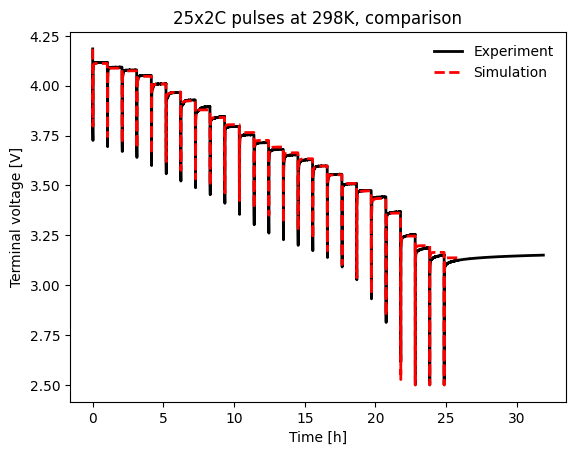

In [33]:
fig, ax = plt.subplots()
ax.plot(t_exp-t_exp[0],V_exp,color='k',linewidth=2,  linestyle='-',label='Experiment')
ax.plot(t_hours,V,color='r',linewidth=2,  linestyle='--',label='Simulation')

ax.set_xlabel('Time [h]')
ax.set_ylabel('Terminal voltage [V]')
ax.set_title('25x2C pulses at 298K, comparison')
ax.legend(loc='best',frameon=False)

#plt.savefig(BasicPath + Target + 'GITT_2C_discharge_298K.png')
plt.show()

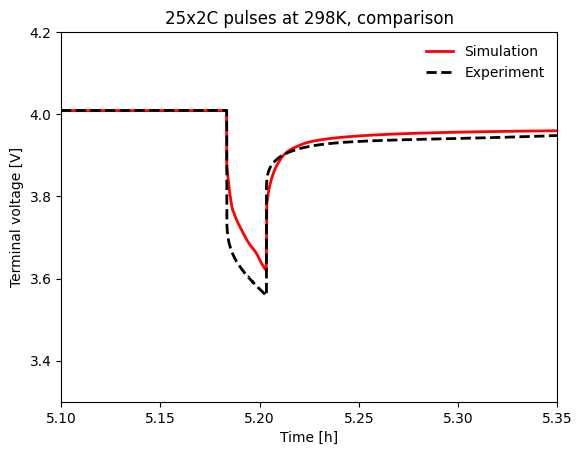

In [32]:
fig, ax = plt.subplots()
ax.plot(t_hours,V,color='r',linewidth=2,  linestyle='-',label='Simulation')
ax.plot(t_exp-t_exp[0],V_exp,color='k',linewidth=2,  linestyle='--',label='Experiment')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Terminal voltage [V]')
ax.set_title('25x2C pulses at 298K, comparison')
ax.legend(loc='best',frameon=False)
plt.xlim(5.1,5.35)
plt.ylim(3.3,4.2)
#plt.savefig(BasicPath + Target + 'GITT_2C_discharge_298K.png')
plt.show()

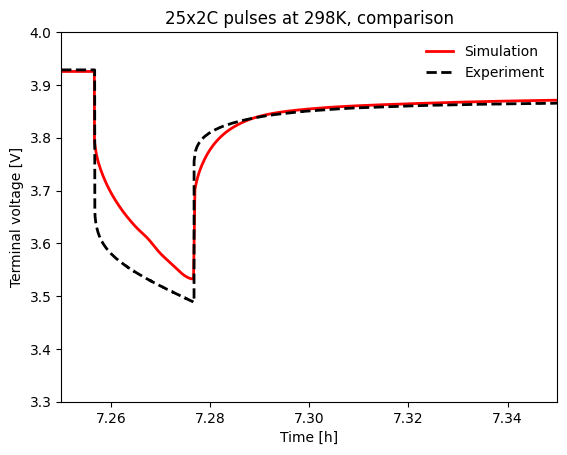

In [24]:
fig, ax = plt.subplots()

ax.plot(t_hours,V,color='r',linewidth=2,  linestyle='-',label='Simulation')
ax.plot(t_exp-t_exp[0],V_exp,color='k',linewidth=2,  linestyle='--',label='Experiment')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Terminal voltage [V]')
ax.set_title('25x2C pulses at 298K, comparison')
ax.legend(loc='best',frameon=False)
plt.xlim(7.25,7.35)
plt.ylim(3.3,4.0)
#plt.savefig(BasicPath + Target + 'GITT_2C_discharge_298K.png')
plt.show()